## Introduction

This tutorial is an introduction to some of the basic techniques in image data processing, particularly focusing on more elementary techniques involving convolutions ans dealing with binary images. Humans have the benefit of higher order cognition which allows us to recognise and categorise visual data we receive into information. Unfortunately, computers aren't blessed with the inherent ability to do the same. Although visual data is extremely abundant, obtaining meaningful information from all this data can be quite challenging.

Though many state-of-the-art computer vision projects involve the use of neural networks, this tutorial will be focused more on how to extract information from images by directly manipulating the images themselves. Image data is a key form of data, especially in the field of robotics. Image data acts as the main bridge from an algorithm to the real world, often times, in depth analysis of visual data such as object recognition involves large scale neural networks and other machine learning techniques, but other times, for simple perception problems, conventional computer vision techniques such as edge detection can be employed to great effect. 

A great example of this would be the use of edge detection in the detection of building clusters in satellite imagery. Below are pictures published by IEEE on this particular subject (click images for source):

[<img src="https://ieeexplore.ieee.org/mediastore_new/IEEE/content/media/6589035/6599417/6599472/6599472-fig-4-source-large.gif" style="width: 50%;"/>](https://ieeexplore.ieee.org/document/6599472)
[<img src="https://ieeexplore.ieee.org/mediastore_new/IEEE/content/media/6589035/6599417/6599472/6599472-fig-5-source-large.gif" style="width: 50%;"/>](https://ieeexplore.ieee.org/document/6599472)

Satellite images are easily accessible, but obtaining information from all this data can be quite hard. Simply wanting to know where clusters of objects are in these images can be quite difficult, but by applying computer vision techniques to these images, a complex image with many aspects to it can be simplified into a set of egdes that show where the main object lies in the image. When applied on a larger scale, image data can be used to map out entire areas. Though at a much alrger scale, many providers of geospatial data such as Google also employ computer vision and image processing techniques to gather data.

## Tutorial Content

In this tutorial we will be going over some basic image processing techniques such as convolutions and thresholding. We will then go over an applied example of these basic methods in the form of edge detection. Finally, we will apply our processing method to a real world detection problem, where we take an image of a checkers board and determine where the pieces are.

The following outlines the content that will be covered:
- [Installing the libraries](#Installing-the-libraries)
- [Downloading Image Datasets](#Downloading-Image-Datasets)
- [Loading and Displaying Images](#Loading-and-Displaying-Images)
- [Manipulating Images](#Manipulating-Images)
    - [Convolutions](#Convolutions)
    - [Thresholding](#Thresholding)
    - [Simple Manipulations: Cropping, Resizing and Rotating](#Simple-Manipulations:-Cropping,-Resizing-and-Rotating)
- [Applied Example: Edge Detection](#Applied-Example:-Edge-Detection)
- [Applied Example: Checkers Board Classification](#Applied-Example:-Checkers-Board-Classification)

## Installing the libraries

The two main libraries we will be using in this tutorial are OpenCV and numpy. These can be installed through `pip` quite easily with the following two commands.

    $ pip install opencv-python
$ pip install numpy

OpenCV is a computer vision specific module built for C++ and Python. It is a great tool for managing image data with many built in methods for dealing with image data. Numpy is mainly used here for manipulating information stored in arrays, as we will learn that image data is usually stored in the form of a numpy array. With the packages installed, all we have to do is import the modules needed in this tutorial

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Downloading Image Datasets

A big part of computer vision and image processing are the images themselves. There are many great image databases out there, most of them with images with description and tags made for training neural networks. Although these databases are a great source of images for a large scale project, this tutorial focuses on the basics of image processing and therefore will not be using external datasets. Instead, there are a few pictures placed within the same directory as this notebook that we will use as examples to illustrate the methods that we will be using.

If you are interested in using your own images or images from an external data set, here are some links to popular open datasets available for free online:

- [MNIST - Handwritten Digits](https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-digits/)
- [MS-COCO](http://cocodataset.org/#home)
- [ImageNet](http://www.image-net.org/)

## Loading and Displaying Images

The first step of processing image data is to load the data in from an external file. For the purpose of this tutorial we will only be using a few example images from the web to illustrate some usefule techniques. Images are stored as a group of pixels with RGB values. Each image can be considered as a three dimensional array. Using the `cv2.imread` function, we can load an image into a numpy array.





In [2]:
# load image as array
img_array = cv2.imread("flower.jpg")
print("Array Dimensions =", np.shape(img_array))
print("First Pixel Values =", img_array[0][0])


Array Dimensions = (1080, 1920, 3)
First Pixel Values = [61 69 82]


Note that the dimensions of the numpy array are (1080, 1920, 3), these correspond to the height, width and channels for the image. What height and width represent are quite self explanatory, but the channels represent the number of colours used to represent the image. Since the image we loaded in is of colour, it has three different colour channels, namely BGR. If we were to convert this image to grayscale, the numpy array will instead have only 1 channel, since a grayscale image only needs information on the pixel intensity where 0 represents a white pixel and 255 represents a black pixel.

After loading the image as a numpy array, we can now display the image. Although OpenCV has a built in method called `cv2.imshow` which displays the image in a seperate window, jupyter notebooks do not support this function and therefore we can plot images as a graph using the matplotlib library instead. The code below shows the code the we will use for displaying images.

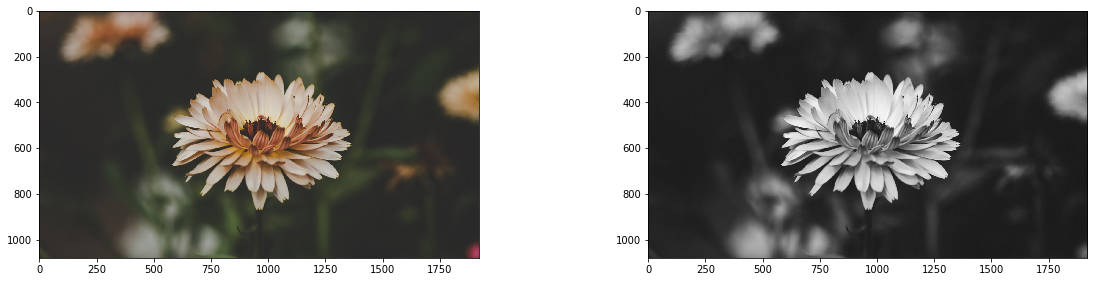

In [3]:
# converting image from BGR format to RGB
img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

# converting to grayscale format
img_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

# plotting images
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.subplot(2, 2, 2)
plt.imshow(img_gray, cmap = 'gray')

For the sake of simplicity and more succinct code, below is a function that will plot multiple images in the same row given a list of numpy arrays and their corresponding image labels/names.

In [4]:
# Function for displaying multiple images side by side
def mul_img_plot(image_list, title_list):
    n = len(image_list)
    for i in range(n):
        plt.subplot(n, n, i+1)
        plt.title(title_list[i])
        plt.imshow(image_list[i], cmap = 'gray')
    return None
    

## Manipulating Images

Now that we know how to load images in, we are going to start manipulating the data we obtain from these raw images. For the purpose of this tutorial we will mainly be focusing on manipulating grayscale images. The reason for this is because this limits the number of channels for each image to 1. Limiting our examples to only grayscale does not actual affect much of the implementation, for each method, instead of applying it to one channel, we can instaed apply it to all channels for multi-channel images. But for simplicity, we will be working with grayscale images from this point on.

### Simple Manipulations: Cropping, Resizing and Rotating

Some simple methods of manipulating images are cropping, resizing and rotating. Since an image is stored as a numpy array, cropping can be done simply by splicing the array. While for resizing and rotating, the `cv2` library is very helpful for executing these transformations. `cv2.resize` will resize an image to the required dimensions and `cv2.warpAffine` can be used in conjuction with a rotation matrix in order to rotate the image. The code for such transformations can be found below.

In [5]:
# cropping the image, splicing away the top and bottom 150 pixels and 400 pixels from left and right
cropped = img_gray[150:-150,400:-400]

# resizing the image to (50, 50) pixels
resized = cv2.resize(img_gray, (50,50), interpolation = cv2.INTER_AREA)

# rotating by 180 degrees
height, width = img_gray.shape[0], img_gray.shape[1]
M = cv2.getRotationMatrix2D((width/2,height/2), 180, 1.0)
rotated = cv2.warpAffine(img_gray, M, (width, height))

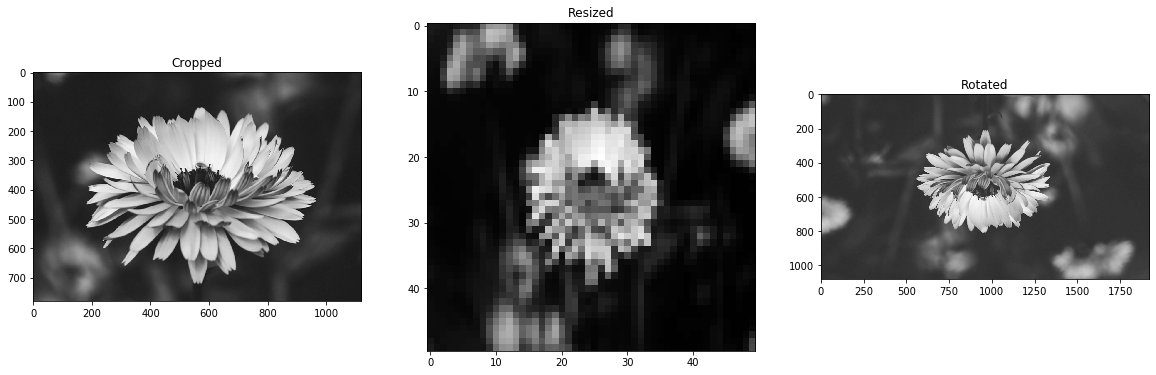

In [6]:
plt.figure(figsize=(20,40))
mul_img_plot([cropped, resized, rotated], ['Cropped', 'Resized', 'Rotated'])

### Convolutions 

Convolutions are possibly the most important part of image processing and extracting information from images. In short, applying a convolution on an array is akin to sliding a filter on top of each pixel, and changing the value of the pixel at that point based on the values of the surrounding pixels. A convolution involves a kernel, which is usually a square matrix. As we apply the convolution onto an image, we place this matrix ontop of a pixel, with the center of the kernel placed onto the pixel we are currently manipulating, and we take the sum of the element-wise multiplication of the kernel and the surrounding pixels that the kernel covers.

A great visual representation of this can be found here, a diagram drawn by the people from [PyImageSearch](https://www.pyimagesearch.com/):

[<img src="https://www.pyimagesearch.com/wp-content/uploads/2016/06/convolutions_kernel_sliding.jpg" width = 300px>](https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/)

Convolutions are very helpful since they provide information on how each pixel relates to its neighbours. Depending on the kernel chosen, convolutions have varying effects and have very different applications.

Before looking at some examples, lets look through the code for applying a concolution on an image. We first take the image array and kernel and then pad the image by duplicating border pixels in order to avoid out of bounds accesses when trying to apply the kernel on pixels located near the borders. We then loop through the entire array and change the value for each pixel to the new value obtained by taking the sum of the pair-wise multiplication between the kernel and the region of interest surrounding the subject pixel.

In [7]:
def convolution(image, kernel):
    n = len(kernel[0])
    pad = (n-1)//2
    h, w = image.shape[:2]
    #padding the array to avoid out of bounds accesses when evaluating the value for pixels on the border
    padded_array = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((h, w), dtype="float32")
    
    for i in range(pad, h + pad):
        for j in range(pad, w + pad):
            roi = padded_array[i-pad:i+pad+1,j-pad:j+pad+1]
            #take the sum of the multiplcation between the kernel and region of interest
            p = (kernel*roi).sum()
            output[i-pad][j-pad] = p
    return output    

We start with a simple kernel of dimensions (5, 5), with all of its elements values 1/25. This effectively averages each pixel with its neighbours and creates a blurring effect. We then apply it to an image of a bear and we can clearly see that the output image is blurred, as the fur is much less defined in the image on the right.

In [8]:
# example of a blurring kernel, this effectively takes the average of all neighbouring pixel values
kernel_blur = np.array([ [ 1/25, 1/25, 1/25, 1/25, 1/25],
                         [ 1/25, 1/25, 1/25, 1/25, 1/25],
                         [ 1/25, 1/25, 1/25, 1/25, 1/25],
                         [ 1/25, 1/25, 1/25, 1/25, 1/25],
                         [ 1/25, 1/25, 1/25, 1/25, 1/25]  ])

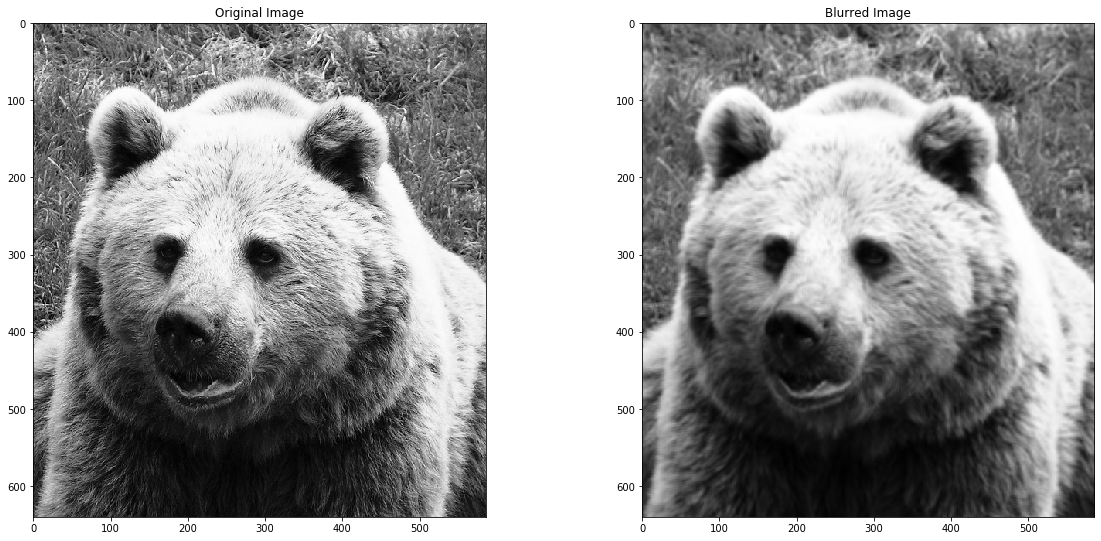

In [9]:
bear_raw = cv2.imread("bear.jpg")
bear_gray = cv2.cvtColor(bear_raw, cv2.COLOR_BGR2GRAY)

blurred = convolution(bear_gray, kernel_blur)

plt.figure(figsize=(20,20))
plot = mul_img_plot([bear_gray,blurred], ['Original Image', 'Blurred Image'])

Aside from blurring, we can also use convolutions to detect rapid changes in pixel values. Below are three commonly used kernels known as laplacian, sobel X and sobel Y. All three of these kernels can highlight rapid changes in pixel intensity as the the kernels only cause a pixel to show large positive/negative values when a pixel is very different from its neighbours. Laplacian is great at detecting small changes around each pixel, while sobel X and sobel Y are great for detecting changes in the X and Y axis respectively.

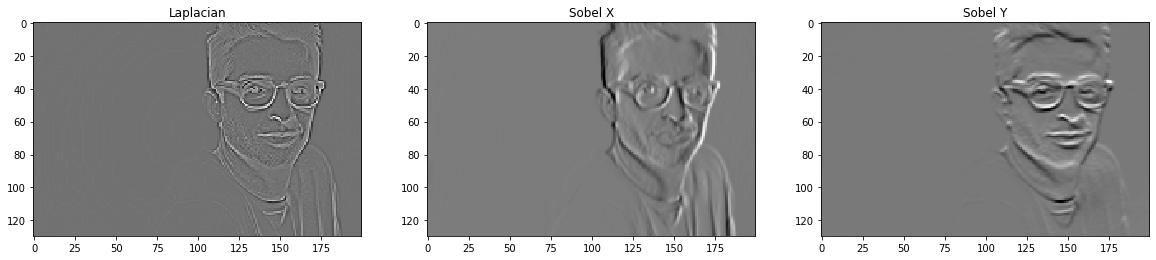

In [10]:
man_raw = cv2.imread('man.jpg')
man_raw = cv2.resize(man_raw, (200,130), interpolation = cv2.INTER_AREA)
man_rgb = cv2.cvtColor(man_raw, cv2.COLOR_BGR2RGB)
man_gray = cv2.cvtColor(man_raw, cv2.COLOR_BGR2GRAY)


# Laplacian is good for detecting rapid gradient changes, 
# measures gradient changes between each pixel and its neighbours
kernel_laplacian = np.array([ [ 0, 1, 0 ],
                              [ 1, -4, 1],
                              [ 0, 1, 0 ]  ])

# Sobel X is good for detecting gradient changes in the X-axis
kernel_sobelX = np.array([[ -1, 0, 1 ], 
                          [ -2, 0, 2 ], 
                          [ -1, 0, 1 ]])

# Sobel Y is good for detecting gradient changes in the Y-axis
kernel_sobelY = np.array([[ 1, 2, 1 ], 
                          [ 0, 0, 0 ], 
                          [ -1, -2, -1]])

plt.figure(figsize=(20,20))
laplacian = convolution(man_gray, kernel_laplacian)
sobelX = convolution(man_gray, kernel_sobelX)
sobelY = convolution(man_gray, kernel_sobelY)
plot = mul_img_plot([laplacian,sobelX,sobelY], ['Laplacian', 'Sobel X', 'Sobel Y'])

As seen from the results above, the laplacian kernel creates an image that highlights all the major edges, but creates a lot of noise, while sobel X and sobel Y are great at highlighting vertical and horizontal edges.

### Thresholding

Another common technique in image manipulations is the idea of image thresholding. We can decide to ignore or include certain pixels based on their individual intensities. We can either set a constant threshold by manually choosing a threshold value or we can compute the mean value for all pixels in the image and threshold based on that. In this version of thresholding, we will be setting all values that pass the threshols to have a value of 255. This is helpful for creating a binary input, as all pixels in the image either have an intensity value of 0 and 255. This will be rather useful later on.

In [11]:
# tresholding function, if no tresholding value is specified, it will threshold based on average value across image
def const_threshold(image, thresh_val = None):
    if thresh_val == None:
        h, w = image.shape[:2]
        thresh_val = image.sum()/(h*w)
    h, w = image.shape[:2]
    output = np.zeros((h, w), dtype="float32")
    for i in range(h):
        for j in range(w):
            # change output to full signal if it is above threshold value
            if image[i][j] > thresh_val:
                output[i][j] = 255
    return output

Here we plot some examples with a variety of thresholding values and also thresholding based on the mean to see the effects of thresholding.

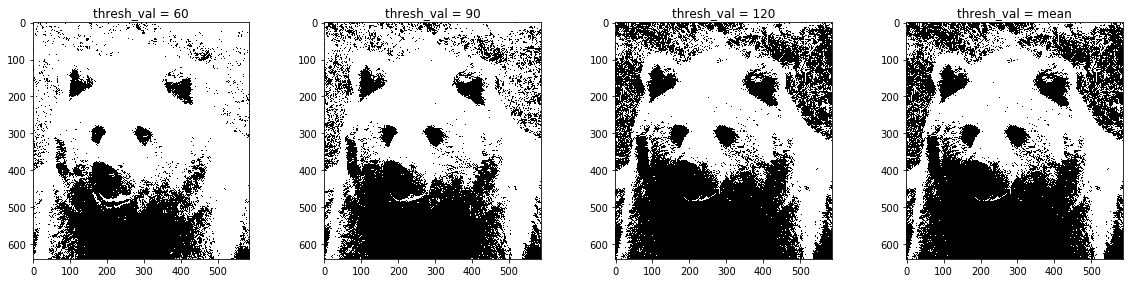

In [12]:
plotlist = [const_threshold(bear_gray,60), const_threshold(bear_gray,90),
            const_threshold(bear_gray,120), const_threshold(bear_gray)]

plt.figure(figsize=(20,20))
plot = mul_img_plot(plotlist, ['thresh_val = 60', 'thresh_val = 90', 'thresh_val = 120', 'thresh_val = mean'])

## Applied Example: Edge Detection

We now move onto a more involved example, as we use the techniques described above in order to create an algorithm that detects the edges in an image. The version of edge detection described below involves the following steps:

- Noise Removal 
- Convolutions Using Sobel X and Y Kernels
- Tresholding
- Erosion

In [13]:
# function used for creating a blurring kernel
def blur_kernel(size = 7):
    return np.array([[1/(size*size)]*size]*size)

We begin by blurring the image with a kernel that averages the values for a pixel with its neighbours, this helps to smooth out the image and remove any noise that may be present. Without this step, edge detection may become sporadic as smaller kernels are very sensitive to small changes in pixel intensities.

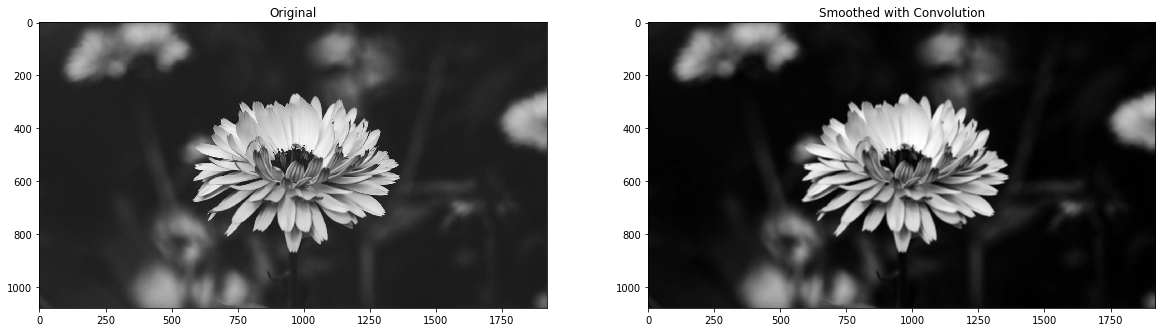

In [14]:
smoothed = convolution(img_gray, blur_kernel())
plt.figure(figsize=(20,20))
plot = mul_img_plot([img_gray,smoothed.astype(int)],['Original','Smoothed with Convolution'])

After smoothing out the image, we apply both sobel kernels onto the output image. Each kernel is great for identifying edges in one dimension, therefore we can combine them to detect edges in both dimensions. We take the image and apply both kernels onto it seperately, and then we take the squareroot of the sum of the squares at each pixel of both images and create a new output array based on those values.

In [15]:
def sobel_filters(img):
    # apply sobel X kernel
    edges_x = convolution(img, kernel_sobelX)
    # apply sobel Y kernel
    edges_y = convolution(img, kernel_sobelY)
    
    # np.hypot makes it so that G[i][j] = sqrt(edges_x[i][j]^2 + edges_y[i][j]^2)
    G = np.hypot(edges_x, edges_y)
    # scaling values to a max of 255
    G = G / G.max() * 255
    return G

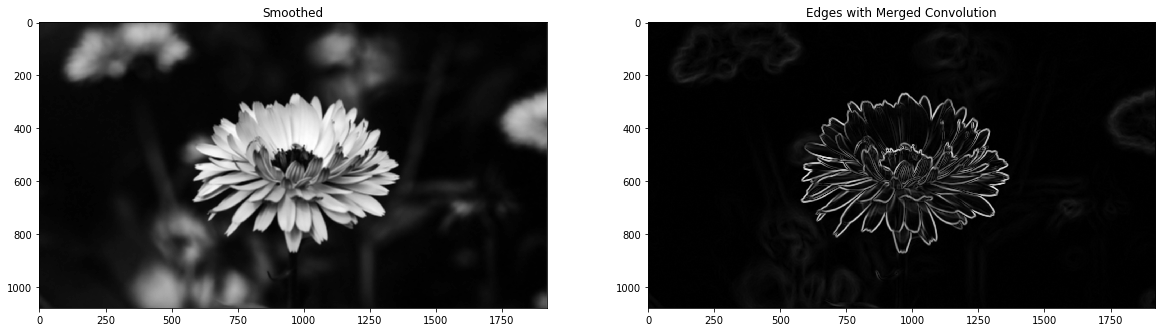

In [16]:
edges = sobel_filters(smoothed)
plt.figure(figsize=(20,20))
plot = mul_img_plot([smoothed.astype(int),edges.astype(int)],['Smoothed','Edges with Merged Convolution'])

As we plot the results out, we see that the initial edges of the image are taking shape, but we still have some work to do as these edges are quite blurry in some places and certain 'weaker' pixels can be seen in the background. If we wish to remove this we can do it simply by thresholding the image to remove any pixels that have an intensity value below a certain value. Here we chose this value manually, but there are other methods of choosing a more accurate thresholding value not covered in this version of edge detection.

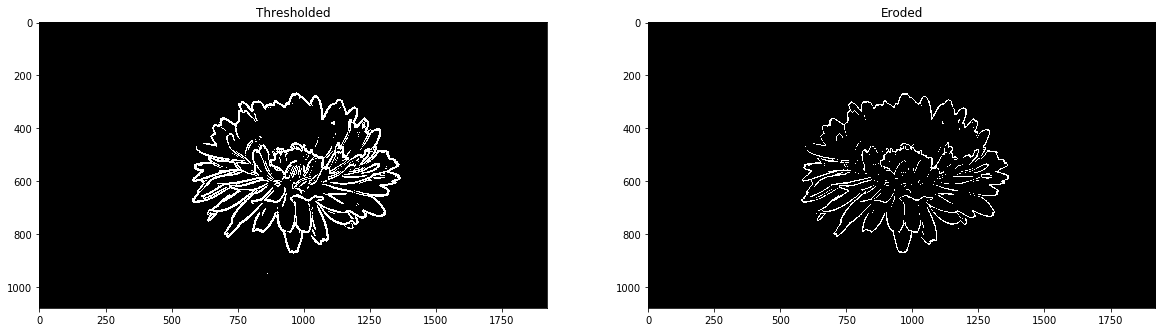

In [17]:
# Thresholding to remove weak pixels
strong_edges = const_threshold(edges, 50)

# Erosion to create more distinct edges
kernel = np.ones((4,4),np.uint8)
eroded = cv2.erode(strong_edges,kernel,iterations = 1)

plt.figure(figsize=(20,20))
plot = mul_img_plot([strong_edges.astype(int),eroded.astype(int)],['Thresholded','Eroded'])

Note that we are left with rather thick edges after thresholding the values, we clean up these edges by carrying out a method called erosion. Effectively, erosion checks whether each pixel is surounded by strong pixels, if they are not, it changes the pixel value to 0. Visually, this removes layers away from an object and creates an effect that is similar to 'erosion' in real life.

With that, we have our very own edge detection algorithm, starting with an image of a flower, we managed to detect the important edges in the image, and with the output image, we can easily determine where the flower is simply by considering where the activated pixels are located in the output image.

## Applied Example: Checkers Board Classification

We will finish off this tutorial with a real life application for our edge detection algorithm. We will be detecting where checkers pieces are given a picture of a board. Our method is quite simple, as we segregate the image into individual squares and and detect whether there is a piece in each square using edge detection. 

We first load up the image of the baord and divide the board up into the 64 individual squares. The code below shows the individual squares and corresponding region of interests based on each of these squares.

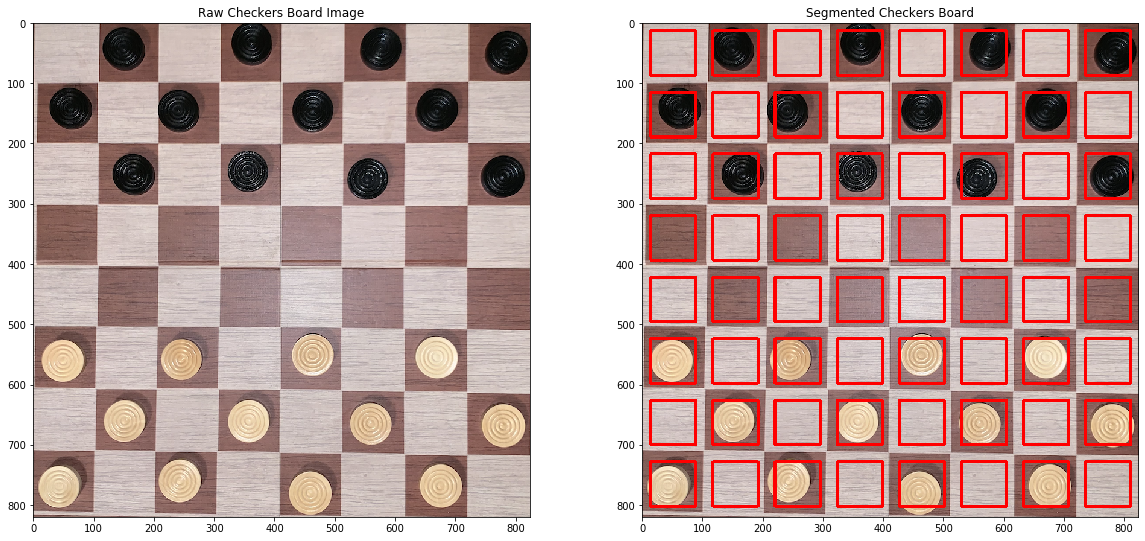

In [18]:
checkers_raw = cv2.imread("checkers.jpg")
checkers_raw = cv2.cvtColor(checkers_raw, cv2.COLOR_BGR2RGB)
checkers_marked = np.copy(checkers_raw)

w, h = checkers_raw.shape[:2]

for i in range(8):
    for j in range(8):
        cv2.rectangle(checkers_marked, ((h//8)*i+14,(w//8)*j+14),((h//8)*(i+1)-14,(w//8)*(j+1)-14),(255,0,0),3)

plt.figure(figsize=(20,20))
mul_img_plot([checkers_raw,checkers_marked],["Raw Checkers Board Image","Segmented Checkers Board"])

First we will write the edge detection algorithm as a single function for easy use.

In [19]:
# Edge detection using method described above
chess_gray = cv2.cvtColor(chess_raw, cv2.COLOR_BGR2GRAY)

def detect_edge(img, erode_size = 4):
    smoothed = convolution(img, blur_kernel())
    edges = sobel_filters(smoothed)
    strong_edges = const_threshold(edges,50)
    kernel = np.ones((erode_size,erode_size),np.uint8)
    eroded = cv2.erode(strong_edges,kernel,iterations = 1)
    return eroded

NameError: name 'chess_raw' is not defined

With the given image, we can carry out edge detection on our given image. Not that the lines between each square are also detected by our algorithm, but since we restrict the region of interest for each square to not include these edges, we can ignore these edges.

In [ ]:
# Running edge detection algorithm on our checkers board
edges = detect_edge(chess_gray)
edges_marked = np.copy(edges)
edges_marked = cv2.cvtColor(edges_marked, cv2.COLOR_GRAY2RGB)

for i in range(8):
    for j in range(8):
        cv2.rectangle(edges_marked, ((h//8)*i+14,(w//8)*j+14),((h//8)*(i+1)-14,(w//8)*(j+1)-14),(255,0,0),3)

plt.figure(figsize=(20,20))
mul_img_plot([edges.astype(int),edges_marked.astype(int)],["Edges","Edges with Bounding Boxes"])

With the output from our edge detection algorithm, we can then decide whether there is a piece in each regoin of interest simply by counting the number of non-zero pixels iwthin the region. In order to account for a certain amount of error, we will threshold this count by a minimum value. If there are more than a certain number of activated pixels within that region, we consider it filled with a piece.

In [ ]:
def read_board(img):
    board = np.zeros((8,8))
    for i in range(8):
        for j in range(8):
            roi1, roi2 = (h//8)*i+14, (h//8)*(i+1)-14
            roi3, roi4 = (w//8)*j+14, (w//8)*(j+1)-14
            curr_roi = img[roi1:roi2,roi3:roi4]
            curr_count = cv2.countNonZero(curr_roi)
            # piece is in the square if it has more than a constant amount of activated pixels
            if curr_count > 50:
                board[i][j] = 1
    return board.astype(int)
    
print(read_board(edges.astype(int)))

Finally, we can simply store the boardstate as a numpy array and we have successfully transferred data from an image into data we can easily handle!

## Summary, References and Further Reading

This tutorial is only a brief introduction into how we can process image data. There are many other ways to gain meaningful information from images and most methods include the use of substantial machine learning methods. This tutorial is more of an introduction to using more 'traditional' methods of computer vision and image processing. More detail about the libraries and refrences from this tutorial used can be found here:

- [Numpy Documentation](https://numpy.org/)
- [OpenCV Documentation](https://opencv.org/)
- [OpenCV Help](https://answers.opencv.org/questions/)
- [IEEE Satellite Data Research](https://ieeexplore.ieee.org/document/6599472)

For further reading, I suggest the following resources as a great starting point if you are interested in the field of computer vision. These resources describe a wide range of techniques from methods as simple as direct pixel manipulations to deep neural networks for classification purposes.

- [PyImageSearch](https://www.pyimagesearch.com/)
- [LearnOpenCV](https://www.learnopencv.com/)
- [Gentle Introduction to Computer Vision](https://machinelearningmastery.com/what-is-computer-vision/)


